In [1]:
# -*- coding: utf-8 -*-
"""
This script reproduces some descriptive statistics of the dataset, 
including the figures shown in the paper, Krippendorff's aggreement, and others.

License:
    BSD 4-clause with attribution License

    Copyright (c) 2021 University of Southampton


@author: Rafael Mestre (R.Mestre@soton.ac.uk)
"""

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn-colorblind')
sns.set_style("white")

In [12]:
#Load original dataset
filename_original = r'full_feature_extraction_dataset.csv'
filepath_original = Path(r'..\data\preprocessed full dataset')
df_dataset = pd.read_csv(Path(filepath_original,filename_original))

#Load full annotated dataset
filename_full = 'full_dataset.csv'
filepath_annotated = Path(r'..\annotated dataset')
df_full = pd.read_csv(Path(filepath_annotated,filename_full))

#Load aggregated dataset
filename_agg = 'aggregated_dataset.csv'
df_agg = pd.read_csv(Path(filepath_annotated,filename_agg))
        
#In full dataset, separate the tainted (untrusted) results from the trusted ones
df_tainted = df_full.copy()
df = df_full[df_full['_tainted']==False]
df = df.reset_index()

# Basic statistics of the dataset
### Including breakdown on the type of questions and total number of labels

In [13]:
debate_dict = {0: 1, 1: 1,
              2: 2, 3: 2,
              4: 3, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3, 10: 3,
              11: 4, 12: 4, 13: 4, 14: 4,
              15: 5, 16: 5}

g_debates = df_dataset.groupby('debate')['text'].count().reset_index()
g_debates['debate_nb'] = g_debates['debate'].transform(lambda x: debate_dict[x])
g_debates = g_debates.groupby('debate_nb')['text'].sum().reset_index()


df_agg['debate_nb'] = df_agg['pair_id'].apply(lambda x: debate_dict[int(x[1:3])])
g_debates['labels'] = df_agg.groupby('debate_nb')['relation'].count().reset_index()['relation']

print('\tDebate statistics')
print('Debate\t# Sentences\t# Labels')
for i in range(5):
    print(str(g_debates['debate_nb'].iloc[i])+'\t'+str(g_debates['text'].iloc[i]) + '\t\t' + str(g_debates['labels'].iloc[i]))
print('Total\t' + str(g_debates['text'].sum()) + '\t\t'  + str(g_debates['labels'].sum()))


print("\n\n")
print('Total test questions: ' + str(df_agg.groupby(['_unit_state'])['relation'].count()['golden']))
print('Active test questions: ' + str(df_agg.groupby(['_golden'])['relation'].count()[True]))
print('Hidden test questions: ' + str(len(df_agg[(df_agg['_unit_state']=='golden') & (df_agg['_golden']==False)])))
print('Finalised questions: ' + str(df_agg.groupby(['_golden'])['relation'].count()[False]))
print('Finalised questions that became gold: ' + str(len(np.unique(df_agg['pair_id'])) - df_agg.groupby(['_golden'])['relation'].count()[False]))
print('Complete unique questions: ' + str(len(np.unique(df_agg['pair_id']))))
print('Total (including test) questions: ' + str(df_agg.groupby(['_golden'])['relation'].count().sum()))

print("\n")
print('Total unique annotations (including gold): ' + str(len(df.index)))
print('Total unique annotations (including gold, with tainted): ' + str(len(df_tainted.index)))
print('Difference: ' + str(len(df_tainted.index) - len(df.index) ))

print('\nTotal unique golden annotations: ' + str(df.groupby('_golden')['relation'].count()[True]))
print('Total unique golden annotations (with tainted): ' + str(df_tainted.groupby('_golden')['relation'].count()[True]))
print('Difference: ' + str(df_tainted.groupby('_golden')['relation'].count()[True] - df.groupby('_golden')['relation'].count()[True]))

print('\nTotal unique annotations: ' + str(df.groupby('_golden')['relation'].count()[False]))
print('Total unique annotations (with tainted): ' + str(df_tainted.groupby('_golden')['relation'].count()[False]))
print('Difference: ' + str(df_tainted.groupby('_golden')['relation'].count()[False] - df.groupby('_golden')['relation'].count()[False]))

print('\nTotal unique trusted contributors: ' + str(len(np.unique(df['_worker_id']))))
print('Total unique contributors (including untrusted): ' + str(len(np.unique(df_tainted['_worker_id']))))

print('\nTotal support labels (including golden): ' + str(df_agg.groupby('relation')['relation'].count()['support']))
print('Total support labels (not golden): ' + str(df_agg[df_agg['_golden']==False].groupby('relation')['relation'].count()['support']))

print('\nTotal attack labels (including golden): ' + str(df_agg.groupby('relation')['relation'].count()['attack']))
print('Total attack labels (not golden): ' + str(df_agg[df_agg['_golden']==False].groupby('relation')['relation'].count()['attack']))

print('\nTotal neither labels (including golden): ' + str(df_agg.groupby('relation')['relation'].count()['neither']))
print('Total neither labels (not golden): ' + str(df_agg[df_agg['_golden']==False].groupby('relation')['relation'].count()['neither']))



	Debate statistics
Debate	# Sentences	# Labels
1	1889		1214
2	1648		1018
3	838		519
4	1132		707
5	1020		646
Total	6527		4104



Total test questions: 104
Active test questions: 101
Hidden test questions: 3
Finalised questions: 4003
Finalised questions that became gold: 48
Complete unique questions: 4051
Total (including test) questions: 4104


Total unique annotations (including gold): 21646
Total unique annotations (including gold, with tainted): 24710
Difference: 3064

Total unique golden annotations: 5746
Total unique golden annotations (with tainted): 7147
Difference: 1401

Total unique annotations: 15900
Total unique annotations (with tainted): 17563
Difference: 1663

Total unique trusted contributors: 104
Total unique contributors (including untrusted): 287

Total support labels (including golden): 384
Total support labels (not golden): 356

Total attack labels (including golden): 120
Total attack labels (not golden): 107

Total neither labels (including golden): 3600
Total neith

## Reproduction of figures from the paper

### Figure 3: relationship between annotations and confidence parameters

#### These are statistics on the _full_ dataset (without the tainted annotations), that is, all the individual annotations, not the aggregated one. 


### Annotation agreement: the confidence in the annotation (calculated according to the agreement between different annotators and their trust score) per type of label (support, attack, neither)

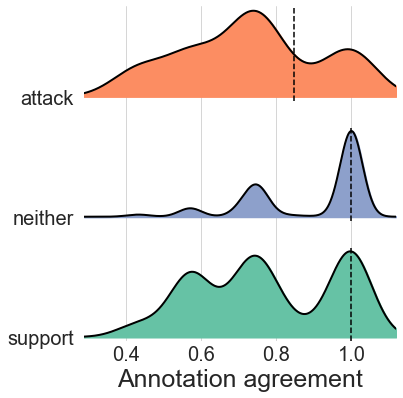

In [15]:
from matplotlib.colors import ListedColormap
import joypy

#Load colormap
cm = ListedColormap(['#fc8d62','#8da0cb','#66c2a5'])
plt.rc("font", size=20)

#Create joyplot (https://deepnote.com/@deepnote/Joyplot-Introduction-RmbhozJJRC6alCu8xcsbHQ)
fig, axes = joypy.joyplot(df_agg, column='relation:confidence', by="relation", ylim='own', figsize=(6,6),
                         colormap=cm, linewidth=2,overlap=0.6,grid='x')
plt.xlabel("Annotation agreement",fontsize=25)

#Print a line in the desired quantile (0.75 by default)
quantiles = df_agg.groupby('relation')['relation:confidence'].quantile([0.25,0.5,0.75])
labels = ['attack','neither','support']

for i in range(3):
    ax = axes[i]
    #ax.axvline(quantiles[labels[i]][0.5], linestyle=':', color='y')
    ax.axvline(quantiles[labels[i]][0.75], linestyle='--', color='k', label='Q3')


plt.tight_layout()

### Trust in the annotator: trust score given according to the number of gold/test questions that they answered correctly

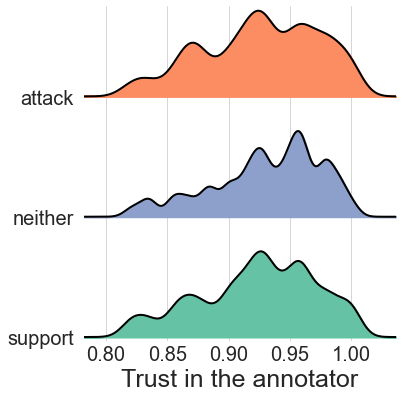

In [66]:
from matplotlib.colors import ListedColormap
import joypy

#Load colormap
cm = ListedColormap(['#fc8d62','#8da0cb','#66c2a5'])
plt.rc("font", size=20)

#Create joyplot (https://deepnote.com/@deepnote/Joyplot-Introduction-RmbhozJJRC6alCu8xcsbHQ)
fig, axes = joypy.joyplot(df, column='_trust', by="relation", ylim='own', figsize=(6,6),
                         colormap=cm, linewidth=2,overlap=0.6,grid='x')
plt.xlabel("Trust in the annotator",fontsize=25)
plt.xticks([0.8,0.85,0.9,0.95,1])

plt.tight_layout()


### Self-confidence score: distribution of self-confidence scores given after each annotation, per label (support, attack, neither)

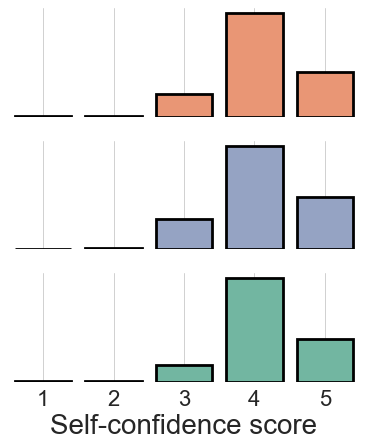

In [16]:
#Make a subplot
fig, axes = plt.subplots(3,1,figsize=(5,6), dpi= 80,sharex=True)
from matplotlib.colors import ListedColormap

#Load colormap
cm = ListedColormap(['#fc8d62','#8da0cb','#66c2a5'])
plt.rc("font", size=20)

#Plot each label in a different subplot
plt.sca(axes[0])
c1 = sns.countplot(x='confidence',data=df[df.relation=="support"] , color='#fc8d62', linewidth=2.5, edgecolor='black')
plt.grid(axis='x')
plt.sca(axes[1])
c2 = sns.countplot(x='confidence',data=df[df.relation=="neither"] , color='#8da0cb', linewidth=2.5, edgecolor='black')
plt.grid(axis='x')
plt.sca(axes[2])
c3 = sns.countplot(x='confidence',data=df[df.relation=="attack"] , color='#66c2a5', linewidth=2.5, edgecolor='black')
#plt.ylim([0,6500])
plt.grid(axis='x')

#Fix ticks and labels
c1.tick_params(bottom=False)
c2.tick_params(bottom=False)
c1.set(xlabel=None,ylabel=None,yticklabels=[])
c2.set(xlabel=None,ylabel=None,yticklabels=[])
c3.set(ylabel=None,yticklabels=[])

plt.xlabel("Self-confidence score",fontsize=25)

sns.despine(left=True, bottom=True)
plt.tight_layout()


### Relationship between trust in the annotator and self-confidence in the annotation (not included in paper): shows that there is no correlation between both parameters. The annotators with higher trust scored didn't tend to select higher self-annotation scores, didn't seem more sure in their annotations.

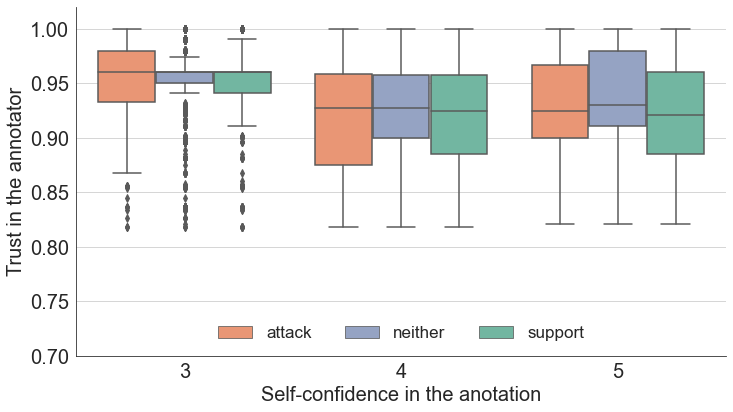

In [17]:
#Filter the values with high self-confidence only (the ones with low confidence are very few)
df_conf3 = df[df['confidence']>= 3].sort_values('relation',ascending=True)

#Create colorpalette
customPalette = sns.set_palette(sns.color_palette(['#fc8d62','#8da0cb','#66c2a5']))

#Plot results
p = sns.catplot(x="confidence", y="_trust", kind="box", data=df_conf3, hue='relation', color=customPalette, legend_out=False)
plt.ylim([0.7,1.02])
plt.legend(loc='lower center', ncol=3, frameon=False, fontsize=17)
plt.grid(axis="y")

p.fig.set_size_inches(12,6)

plt.ylabel("Trust in the annotator")
plt.xlabel("Self-confidence in the anotation")

plt.show()



### Distribution of the annotators with respect to the number of annotations they provided

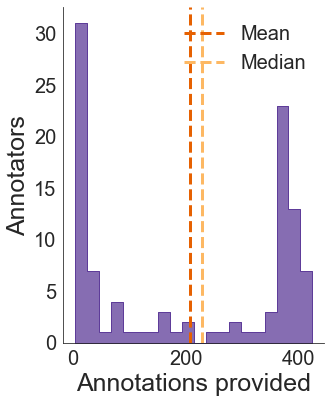

In [18]:

# Set your custom color palette
colors = ['#5e3c99']
customPalette = sns.set_palette(sns.color_palette(colors))

#Group results by worker id
g = df.groupby('_worker_id')['index'].count().rename('counts')

#Plot histogram
fig = plt.figure(figsize=(5,6))
sns.histplot(data=pd.DataFrame(g),x='counts', element='step', bins=20)
plt.axvline(g.mean(), linestyle='--',color='#e66101', linewidth = 3, label='Mean')
plt.axvline(g.median(), linestyle='--',color='#fdb863', linewidth = 3, label='Median')

#Decorate
plt.legend(frameon=False)
plt.xlabel('Annotations provided', fontsize=25)
plt.ylabel('Annotators', fontsize=25)
sns.despine()
plt.tight_layout()


### Figure 2: descriptive visualisation of the annotated dataset.

#### These are statistics of the aggregated dataset, that is, the final annotations of each pair of sentences after being annotated several times.


### Number of pairs of sentences annotated for support, attack or neither

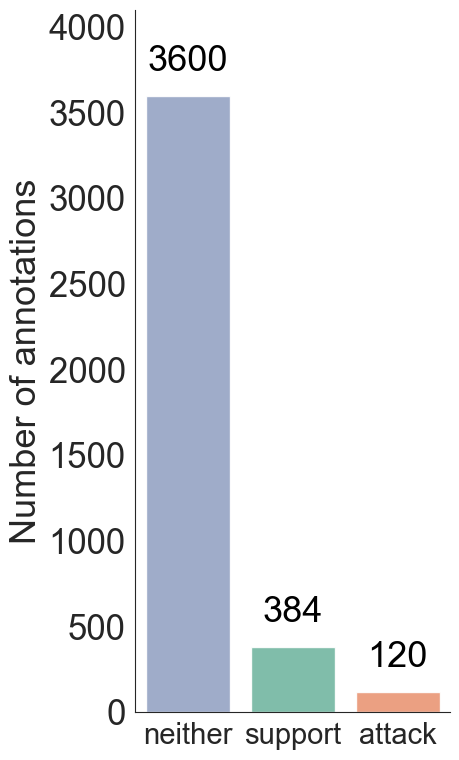

In [19]:
plt.figure(figsize=(5,8), dpi= 100)

#Group aggregated dataset by relation
g_relation = df_agg.groupby('relation')['relation'].count().rename('counts')
g_relation = pd.DataFrame(g_relation)
g_relation.index.name = 'index'
g_relation = g_relation.reindex(['neither','support','attack']) #To change the order in the plot
g_relation.reset_index(inplace=True)

#Create colorpalette
customPalette = sns.set_palette(sns.color_palette(['#8da0cb','#66c2a5','#fc8d62']))

#Plot results
sns.barplot(x = "index",y="counts", data = g_relation, alpha=0.9, color = customPalette)
plt.xticks(fontsize =21)
plt.yticks(fontsize=25)
plt.ylim([0,np.max(g_relation.counts)+500])
plt.ylabel("Number of annotations", fontsize=26)
plt.xlabel("")

#Add numbers on top
for x, y in zip(g_relation.index, g_relation.counts):
    t = plt.text(x, y+200, y, horizontalalignment='center', fontsize = 26,
                 verticalalignment='center', fontdict={'color':'black'})

sns.despine()
plt.tight_layout()


### Distribution of sentences per topic in the original dataset (individual)

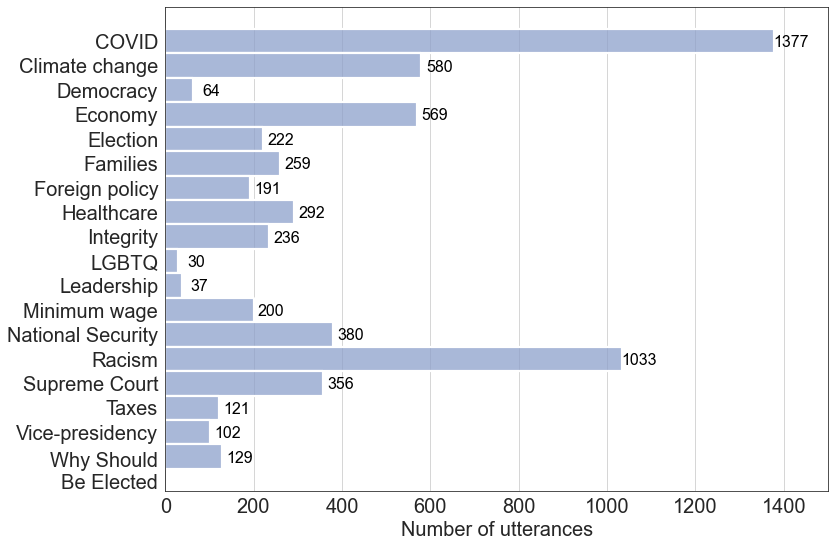

In [20]:
import textwrap #Used to wrap the text of the label "Whey They Should Be Elected"

#Group results
g_topic_count = df_dataset.groupby(['context'])['id'].count().rename('counts')
g_topic_count = g_topic_count.reset_index()

#Create histogram
fig = plt.figure(figsize=(12,8))
sns.histplot(g_topic_count,y="context",weights='counts')
plt.ylabel("")
plt.grid(axis='x')
plt.xlabel("Number of utterances")
plt.xlim([0,1500])

#Write labels
labels = list(g_topic_count.context.values)
yticks = plt.gca().get_yticks()
yticks[-1] = 17.5
labels[-1] = textwrap.fill("Why Should Be Elected", 12)
plt.yticks(yticks,labels)

#Write numbers on top of the bars
for x, y in zip(g_topic_count.counts, g_topic_count.index):
    t = plt.text(x+40, y+0.05, x, horizontalalignment='center', fontsize = 16,
                 verticalalignment='center', fontdict={'color':'black'})

plt.tight_layout()

### Distribution of percentage of argumentative relations per topic (individual)

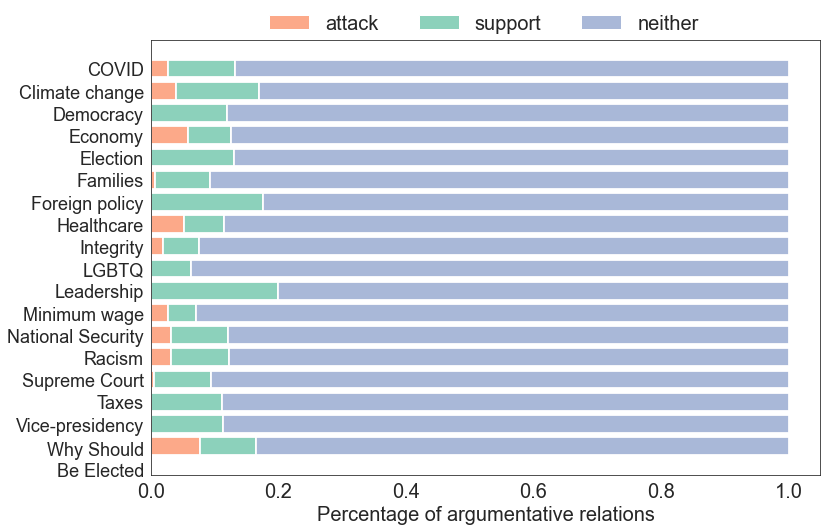

In [21]:
#Group by topic and relation
g_topic = df_agg.sort_values(by='relation',ascending=False).groupby(['topic','relation'])['relation'].count().rename('count')
g_topic = (g_topic / g_topic.groupby(level=0).sum()).rename('freq')
g_topic = g_topic.groupby('topic',group_keys=False).apply(lambda x: x.sort_values(ascending=False))
g_topic = g_topic.reset_index()

#Create palette
customPalette = sns.set_palette(sns.color_palette(['#8da0cb','#66c2a5','#fc8d62']))

#Plot results
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(
    g_topic,
    y='topic',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    weights='freq',
    hue='relation',
    multiple='stack',
    palette=customPalette,
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
)
plt.yticks(fontsize=18)
plt.ylabel("")
plt.xlabel("Percentage of argumentative relations")

#Fix legend
old_legend = ax.legend_
handles = old_legend.legendHandles
labels = [t.get_text() for t in old_legend.get_texts()]
order = [2,1,0]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order]
          , loc=2,bbox_to_anchor=(0.15, 1.1), ncol=3, frameon=False)

#Add labels
labels = list(g_topic_count.context.values)
yticks = plt.gca().get_yticks()
yticks[-1] = 17.5
labels[-1] = textwrap.fill("Why Should Be Elected", 12)
plt.yticks(yticks,labels)
plt.show()

### Distribution of sentences per topic in the original dataset and of percentage of argumentative relations per topic (used in the paper)

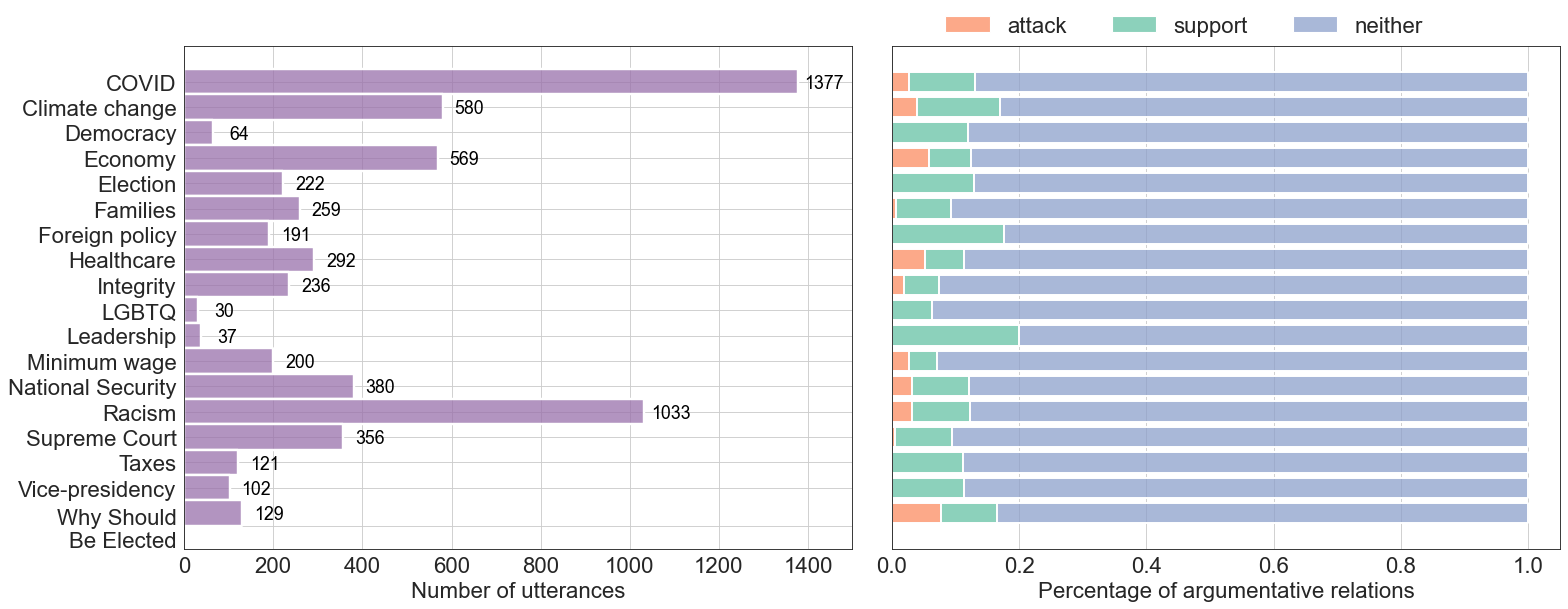

In [22]:
#Create colorpalette
customPalette = sns.set_palette(sns.color_palette(['#8da0cb','#66c2a5','#fc8d62']))

#Create subplot
fig, axes = plt.subplots(1,2,figsize=(20,8), sharey=True, dpi=80)

#Group results by topic for left plot
g_topic_count = df_dataset.groupby(['context'])['id'].count().rename('counts')
g_topic_count = g_topic_count.reset_index()

#Plot left
sns.histplot(g_topic_count,y="context",weights='counts',ax=axes[0], color=['#9970ab'])
axes[0].set_xlim([0,1500])

#Add text on the side of the bars
for x, y in zip(g_topic_count.counts, g_topic_count.index):
    t = axes[0].text(x+60, y+0.05, x, horizontalalignment='center', fontsize = 16,
                 verticalalignment='center', fontdict={'color':'black'})

#Add Y-labels
labels = list(g_topic_count.context.values)
yticks = plt.gca().get_yticks()
yticks[-1] = 17.5
labels[-1] = textwrap.fill("Why Should Be Elected", 12)
plt.yticks(yticks,labels)


#Group by topic and relation for right plot
g_topic = df_agg.sort_values(by='relation',ascending=False).groupby(['topic','relation'])['relation'].count().rename('count')
g_topic = (g_topic / g_topic.groupby(level=0).sum()).rename('freq')
g_topic = g_topic.groupby('topic',group_keys=False).apply(lambda x: x.sort_values(ascending=False))
g_topic = g_topic.reset_index()

#Plot results
plt.sca(axes[1])
ax = sns.histplot(
    g_topic,
    y='topic',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    weights='freq',
    hue='relation',
    multiple='stack',
    palette=customPalette,
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8,
    ax=axes[1]
)

#Fix legend
old_legend = axes[1].legend_
handles = old_legend.legendHandles
labels = [t.get_text() for t in old_legend.get_texts()]
order = [2,1,0]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order]
          , loc=2,bbox_to_anchor=(0.05, 1.1), ncol=3, frameon=False)

#Add grids
axes[0].grid(axis='x')
axes[0].grid(axis='y')
axes[1].grid(axis='x')

#Fix labels
plt.ylabel("")
axes[0].set_xlabel("Number of utterances")
axes[0].set_ylabel("")
axes[1].set_xlabel("Percentage of argumentative relations")
axes[1].set_ylabel("")
plt.tight_layout()

### Distribution of argumentative relations per topic in absolute numbers (not used in the paper)

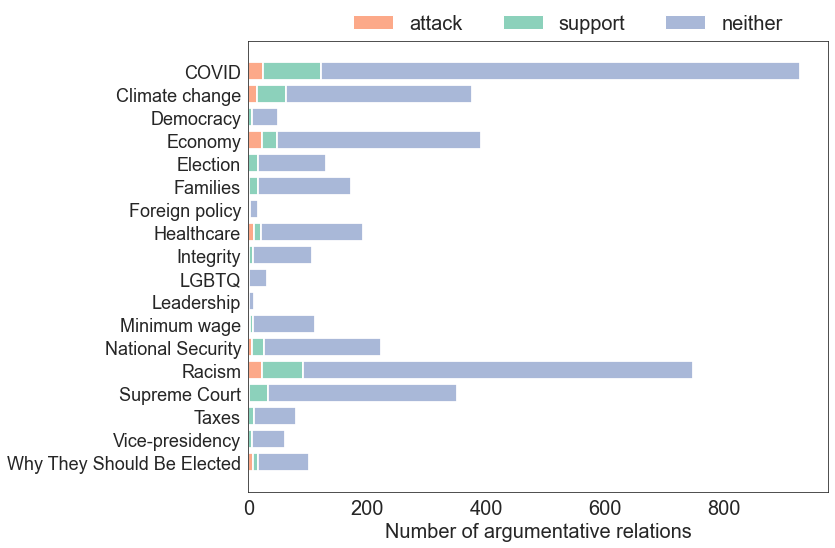

In [23]:
#Group by topic
g_topic = df_agg.sort_values(by='relation',ascending=False).groupby(['topic','relation'])['relation'].count().rename('count')
g_topic = g_topic.groupby('topic',group_keys=False).apply(lambda x: x.sort_values(ascending=False))
g_topic = g_topic.reset_index()


#Plot results
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(
    g_topic,
    y='topic',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    weights='count',
    hue='relation',
    multiple='stack',
    #palette=['#24b1d1', '#ae24d1'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
)
plt.yticks(fontsize=18)
plt.ylabel("")
plt.xlabel("Number of argumentative relations")

#Fix legend
old_legend = ax.legend_
handles = old_legend.legendHandles
labels = [t.get_text() for t in old_legend.get_texts()]
order = [2,1,0]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order]
          , loc=2,bbox_to_anchor=(0.15, 1.1), ncol=3, frameon=False)

plt.tight_layout()


# Statistics about the speakers


In [24]:
#List of unique speakers
speakers = np.unique(df_dataset['speaker'])

#Group by speakers
g = df_dataset.groupby('speaker')['text'].count().rename('count')
#All audience members are aggregated into a single "Audience" label
audience_count = 0
for i, name in enumerate(g.index):
    if 'Audience' in name:
        audience_count += g[i]

#Group speakers by number of utterances for ALL speakers (including moderators and audience)
count_filtered_all = [g.loc['Donald Trump'], g.loc['Joe Biden'], g.loc['Kamala Harris'],
                      g.loc['Mike Pence'], g.loc['George Stephanopoulos'], g.loc['Kristen Welker'],
                               g.loc['Chris Wallace'],g.loc['Savannah Guthrie'],
                               g.loc['Susan Page'],audience_count]
names_all = ['Donald Trump','Joe Biden','Kamala Harris','Mike Pence', 'George Steph.',
             'Kristen Welker','Chris Wallace','Savannah Guthrie','Susan Page','Audience Members']
g_filtered = pd.DataFrame(list(zip(names_all, count_filtered_all)), columns=['speaker','counts'])
g_filtered.sort_values('counts',inplace=True)
g_filtered.reset_index(inplace=True)

#Group speakers by number of utterances only for the main speakers (the candidates)
g_filtered_main = g_filtered[g_filtered['speaker'].isin(['Donald Trump','Joe Biden', 'Kamala Harris','Mike Pence'])]
g_filtered_main.reset_index(inplace=True)
g_filtered_main


,level_0,index,speaker,counts
0,5,2,Kamala Harris,366
1,6,3,Mike Pence,378
2,8,1,Joe Biden,1825
3,9,0,Donald Trump,2266


## Figure 1: descriptive visualisation of the original dataset

### Lollipop plot of the number of utterances per speaker (only candidates)

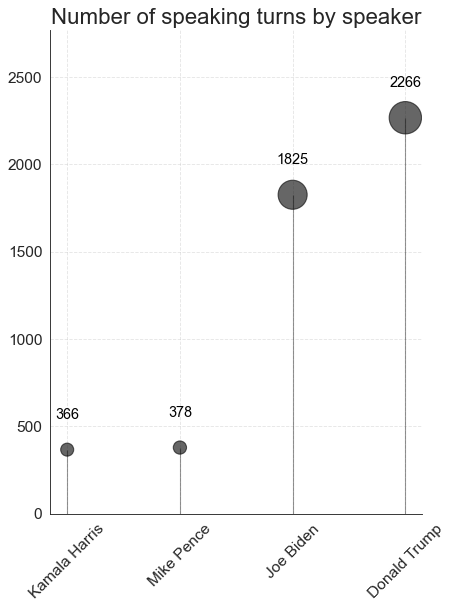

In [25]:
#Plot vertical lines of the "lollipop plot"
plt.figure(figsize=(6,8), dpi= 80)
plt.vlines(x=g_filtered_main.index, ymin=0, ymax=g_filtered_main.counts,
           color='k', alpha=0.4, linewidth=1)

#Plot the tip of the lollipop with a scatter plot, with its size weigthed by the absolute number
plt.scatter(g_filtered_main.index,g_filtered_main.counts, alpha=0.6, 
            s=850*(g_filtered_main.counts/np.max(g_filtered_main.counts)), color ='black')
plt.xticks(g_filtered_main.index, g_filtered_main.speaker, rotation = 45, fontsize =14)
plt.yticks(fontsize=14)
plt.ylim([0,np.max(g_filtered_main.counts)+500])

#Add text on top of the lollipop
for x, y in zip(g_filtered_main.index, g_filtered_main.counts):
    t = plt.text(x, y+200, y, horizontalalignment='center', fontsize = 13,
                 verticalalignment='center', fontdict={'color':'black'})

# Decorate
sns.despine()
plt.title('Number of speaking turns by speaker', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

### Lollipop plot of the number of utterances per speaker (all speakers)

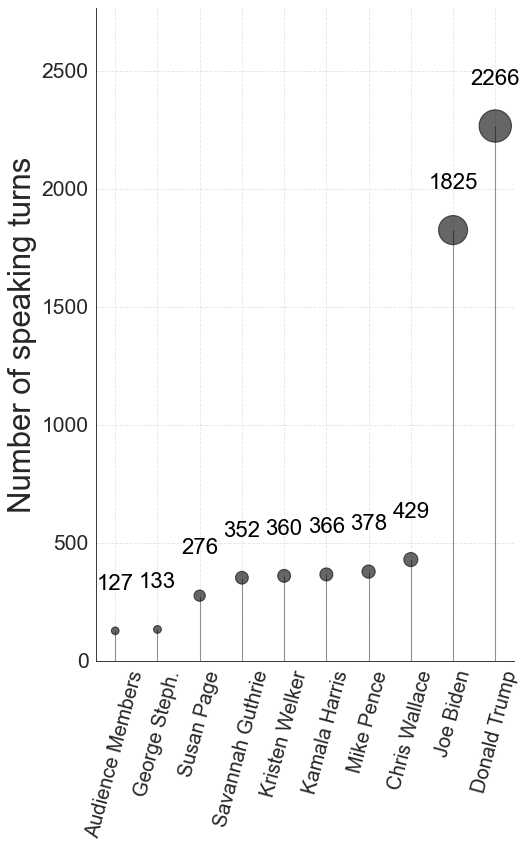

In [26]:
#Plot vertical lines of the "lollipop plot"
fig = plt.figure(figsize=(7,11), dpi= 80)
plt.vlines(x=g_filtered.index, ymin=0, ymax=g_filtered.counts,
           color='k', alpha=0.4, linewidth=1)

#Plot the tip of the lollipop with a scatter plot, with its size weigthed by the absolute number
plt.scatter(g_filtered.index,g_filtered.counts, alpha=0.6, 
            s=850*(g_filtered.counts/np.max(g_filtered.counts)), color ='black')
plt.xticks(g_filtered.index, g_filtered.speaker, rotation = 75, fontsize =18)
plt.yticks(fontsize=19)
plt.ylabel('Number of speaking turns', fontsize = 28)
plt.ylim([0,np.max(g_filtered.counts)+500])

#Add text on top of the lollipop
for x, y in zip(g_filtered.index, g_filtered.counts):
    t = plt.text(x, y+200, y, horizontalalignment='center', fontsize = 20,
                 verticalalignment='center', fontdict={'color':'black'})

    
# Decorate
sns.despine()
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()



### Average sentence length for all speakers (including moderators and audience)

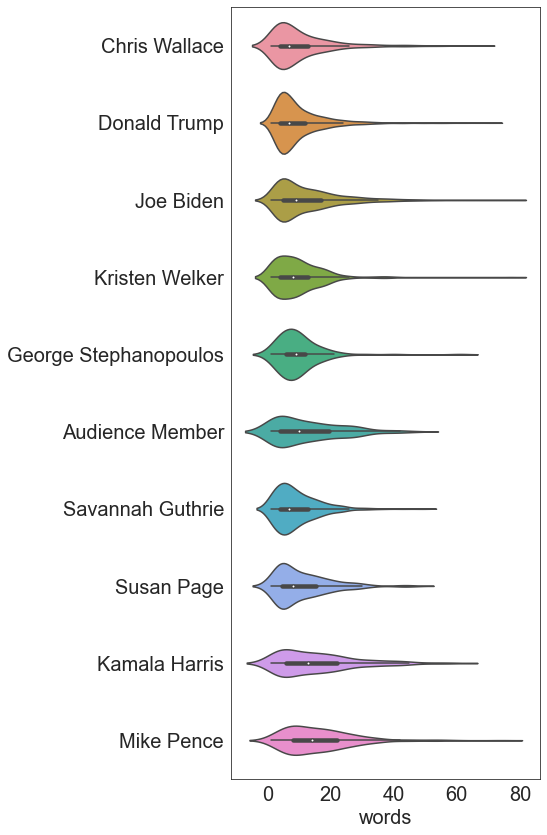

In [27]:

fig = plt.figure(figsize=(8,12))

#Copy original dataset and add two columns (char and words) to count the number of characters and words in a sentence
g_sen_len = df_dataset.copy()
g_sen_len.columns
g_sen_len['speaker'] = g_sen_len.apply(lambda x: 'Audience Member' if 'Audience' in x['speaker'] else x['speaker'], axis = 1)
g_sen_len['speaker'] = g_sen_len.apply(lambda x: np.nan if x['speaker'] in ['Voice Over','error'] else x['speaker'], axis = 1)
g_sen_len['char'] = g_sen_len.apply(lambda x: len(x['text']), axis=1)
g_sen_len['words'] = g_sen_len.apply(lambda x: len(x['text'].split()), axis=1)

#Plot violin plot with number of words per sentence
sns.violinplot(x='words',y='speaker',data=g_sen_len)
plt.ylabel("")
plt.tight_layout()

### Average sentence length only for candidates

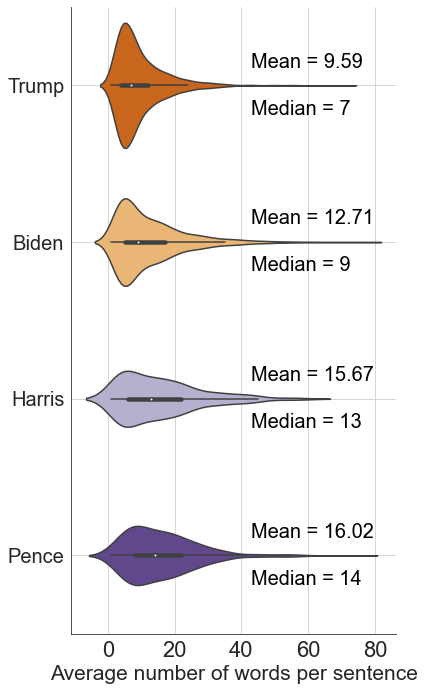

In [28]:
fig = plt.figure(figsize=(6,10))

#Add colorpalette
#https://colorbrewer2.org/#type=diverging&scheme=PuOr&n=4
colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
customPalette = sns.set_palette(sns.color_palette(colors))

#Get statistics like mean and median words per sentence
speakers_data = g_sen_len[g_sen_len['speaker'].isin(['Donald Trump','Joe Biden','Mike Pence','Kamala Harris'])]
median_words = speakers_data.groupby('speaker').median()['words']
mean_words = speakers_data.groupby('speaker').mean()['words']

#Plot violin plot with results
sns.violinplot(x='words',y='speaker',
               data=speakers_data,
              color= customPalette, alpha = 0.8)

#Add text with the mean and median values
for i in range(4):
    t = plt.text(43, i-0.15, 'Mean = ' + str(round(mean_words.iloc[i],2)), horizontalalignment='left', fontsize = 20,
                 verticalalignment='center', fontdict={'color':'black'})
    t = plt.text(43, i+0.15, 'Median = ' + str(median_words.iloc[i]), horizontalalignment='left', fontsize = 20,
                 verticalalignment='center', fontdict={'color':'black'})

#Decorate
plt.ylabel("")
plt.xlabel("Average number of words per sentence",fontsize=21)
plt.xticks(fontsize=22)
plt.gca().set_yticklabels(["Trump","Biden", "Harris","Pence"])
plt.grid()
sns.despine()
plt.tight_layout()


### Most common words

In [29]:
#Download nltk packages
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rmc1r21\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
import itertools
import collections

df_tokenize = df_dataset.copy()

#Tokenize sentences adding an extra column
df_tokenize['toke'] = df_tokenize.apply(lambda x: word_tokenize(x['text'].lower()), axis=1)
#Remove stopwords
df_tokenize['toke'] = df_tokenize.apply(lambda x: [word for word in x['toke'] if not word in stop_words], axis=1)
#Remove punctuation
df_tokenize['toke'] = df_tokenize.apply(lambda x: [word for word in x['toke'] if word.isalpha()], axis=1)

#Retain only the tokenised words in a list
sentences = list(df_tokenize['toke'])
words = list(itertools.chain(*sentences))
#Do a counter
counts = collections.Counter(words)

#Print most common words
common = [counts.most_common(30)[i][0] for i in range(30)]
print(counts.most_common(30))    

[('president', 634), ('going', 506), ('people', 495), ('said', 270), ('know', 266), ('would', 256), ('vice', 228), ('want', 222), ('let', 220), ('trump', 215), ('get', 209), ('say', 209), ('one', 205), ('biden', 201), ('joe', 200), ('right', 196), ('well', 192), ('go', 181), ('thank', 180), ('think', 168), ('question', 164), ('american', 163), ('like', 162), ('look', 155), ('got', 148), ('two', 130), ('way', 128), ('time', 126), ('years', 125), ('done', 125)]


In [31]:
#Aggregate number of occurences per sentence per speaker
df_tokenize_common = df_tokenize[['speaker','toke']]

for c in common:
    df_tokenize_common[c] = df_tokenize_common.apply(lambda x: True if c in x['toke'] else False, axis = 1)

for c in common:
    df_tokenize_common = df_tokenize_common.join(df_tokenize_common.groupby('speaker')[c].sum(), on = 'speaker', rsuffix = '_count')

df_tokenize_common = df_tokenize_common.drop('toke', axis=1)

g_toke = pd.DataFrame()
for c in common:
    g_aux = df_tokenize_common.groupby(['speaker'])[c].sum().rename(c)
    g_toke = pd.concat([g_toke,pd.DataFrame(g_aux)], axis=1)

#Aggregate all audience members in one
audience_list = list()
for c in common:
    audience_count = 0
    for i, name in enumerate(g_toke.index):
        print
        if 'Audience' in name:
            audience_count += g_toke.iloc[i][c]
    audience_list.append(audience_count)

names_all = ['Donald Trump','Joe Biden','Kamala Harris','Mike Pence', 'George Steph.',
         'Kristen Welker','Chris Wallace','Savannah Guthrie','Susan Page','Audience Members']

#Filter and group results
g_filtered = pd.DataFrame(names_all,columns=['speaker'])
g_filtered_main = pd.DataFrame(['Donald Trump','Joe Biden','Kamala Harris','Mike Pence'],columns=['speaker'])

for i, c in enumerate(common):

    count_filtered_all = [g_toke.loc['Donald Trump'][c], g_toke.loc['Joe Biden'][c], g_toke.loc['Kamala Harris'][c],
                      g_toke.loc['Mike Pence'][c], g_toke.loc['George Stephanopoulos'][c], g_toke.loc['Kristen Welker'][c],
                               g_toke.loc['Chris Wallace'][c],g_toke.loc['Savannah Guthrie'][c],
                               g_toke.loc['Susan Page'][c],audience_list[i]]
    
    g_aux = pd.DataFrame(list(zip(names_all, count_filtered_all)), columns=['speaker',c+'_counts'])
    g_filtered = pd.merge(g_filtered,g_aux,on='speaker')
        
    g_filtered_main = pd.merge(g_filtered_main,
                               g_aux[g_aux['speaker'].isin(['Donald Trump','Joe Biden', 'Kamala Harris','Mike Pence'])],
                               on='speaker')

g_filtered_main = g_filtered_main.set_index('speaker')
g_filtered = g_filtered.set_index('speaker')


<ipython-input-31-98eed345b08e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tokenize_common[c] = df_tokenize_common.apply(lambda x: True if c in x['toke'] else False, axis = 1)


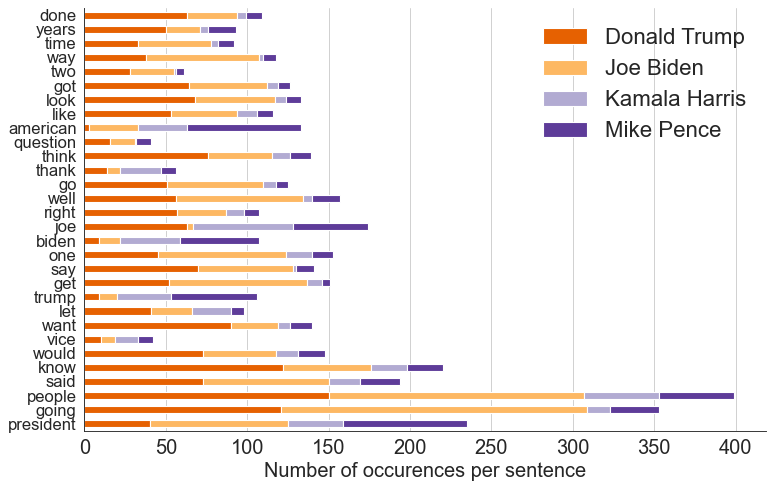

In [32]:
#Plot results
#sns.color_palette("colorblind")

# Set your custom color palette
#https://colorbrewer2.org/#type=diverging&scheme=PuOr&n=4
colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
customPalette = sns.set_palette(sns.color_palette(colors))

#Plot results only for the four candidates
fig = plt.figure(dpi=80, figsize=(11,7))
ax = g_filtered_main.T.plot(kind='barh', stacked=True,ax = plt.gca(), color=customPalette)

#Decorate
ax.set_yticklabels(common)
plt.yticks(fontsize=15)
plt.xticks(fontsize=18)
plt.xlabel('Number of occurences per sentence', fontsize=18)
sns.despine()
plt.grid(axis="x")
ax.legend(loc='upper right', frameon=False, fontsize = 20)


# Interannotator agreement results

In [33]:
from nltk import agreement

### Rerport of Kippendorff's alpha filtering by different trust scores and self-confidence in the annotation

In [34]:

print('\tTrust\tConf.\tKrippendorff\'s alpha\tWorkers\t#Annot.\t#Supp.\t#Att.')
for i in [0.8,0.85,0.9,0.95,1]:
    print('\n')
    for j in [1,2,3,4,5]:
        
        g = df[(df['_trust']>=i) & (df['confidence'] >= j)][['_worker_id','pair_id','relation']]
        ratingtask = agreement.AnnotationTask(data=g.values)
        if j == 1:
            print('\t'+str(i)+'\t' + str(j) + '\t' + str(ratingtask.alpha()) + 
                  '\t'+str(len(np.unique(g['_worker_id'])))+'\t' + str(len(g.index))+ 
                  '\t'+str(len(g[g['relation']=='support'])) + '\t'+str(len(g[g['relation']=='attack'])))
        else:
            print('\t\t' + str(j) + '\t' + str(ratingtask.alpha()) + 
                  '\t'+str(len(np.unique(g['_worker_id'])))+'\t'+str(len(g.index))+
                  '\t'+str(len(g[g['relation']=='support'])) + '\t'+str(len(g[g['relation']=='attack'])))
            



	Trust	Conf.	Krippendorff's alpha	Workers	#Annot.	#Supp.	#Att.


	0.8	1	0.4345506922329784	104	21646	4370	2036
		2	0.43699573657067303	104	21572	4357	2029
		3	0.438958092318929	104	21473	4343	2018
		4	0.45279384430055525	98	18278	3774	1812
		5	0.5684190071663182	93	5941	1133	530


	0.85	1	0.44234305401955876	96	20342	4056	1919
		2	0.44510771734833465	96	20268	4043	1912
		3	0.4465380184305965	96	20178	4032	1902
		4	0.4608815172612869	90	17083	3486	1705
		5	0.5866209300899651	88	5666	1069	514


	0.9	1	0.4611944368976989	76	16747	3251	1508
		2	0.4646380480361394	76	16673	3238	1501
		3	0.46608743365552274	76	16591	3227	1492
		4	0.4849656345065321	70	13779	2719	1309
		5	0.6256026308481089	69	4615	792	407


	0.95	1	0.5382015994224185	53	9066	1562	776
		2	0.5440154614939814	53	9024	1553	770
		3	0.5476035562957702	53	8964	1546	765
		4	0.587159364103457	47	6513	1122	614
		5	0.7170087881018612	46	2393	346	175


	1	1	0.4418316831683168	27	746	248	117
		2	0.4418316831683168	27	745	248	117
		3	0.47

### Rerport of Kippendorff's alpha filtering by different number of workers (from 10 to 104) that provided the largest number of annotations

#### Providing many annotations doesn't seem to be related to best agreement

In [35]:
g_workers = df.groupby('_worker_id').count()['pair_id'].reset_index(name='count').sort_values(['count'], ascending=False)

print('Krippendorff\'s alpha\t# Annotators\t#Annotations\n')
for nb_workers in [10,30,50,70,90, 104]:
    g = df[df['_worker_id'].isin(g_workers['_worker_id'].iloc[:nb_workers].values)][['_worker_id','pair_id','relation']]
    ratingtask = agreement.AnnotationTask(data=g.values)
    print(str(ratingtask.alpha()) + '\t'+str(len(np.unique(g['_worker_id'])))+'\t\t' + str(len(g.index)))

    

Krippendorff's alpha	# Annotators	#Annotations

0.34537128844191556	10		4044
0.43455443062732757	30		11660
0.4468101832243202	50		18728
0.4335797389488024	70		21197
0.4330322917808914	90		21558
0.4345506922329784	104		21646
